# Aim of the Analysis

The aim of this analysis is to determine whether the Republican candidates received a significantly smaller percentage of the vote in 2008 compared to 2012. This is tested by examining the mean difference in vote percentages between the two years using a paired-sample t-test.


In [2]:
import pandas as pd

df= pd.read_feather(r"E:\Python Folder\repub_votes_potus_08_12.feather")
df.head()


,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


In [3]:
df.describe()

,repub_percent_08,repub_percent_12
count,100.000000,100.000000
mean,58.063123,60.940232
std,12.826146,13.634216
min,27.646669,25.708598
25%,49.920860,53.523304
50%,58.637381,63.245448
75%,67.877051,69.986085
max,90.125673,91.003460


#Task:I will run a Hypotesis Testing on this Data Set

Question 1: what i sthe percentage of Republican candidate votes lower in 2008 than 2012?

One question is whether the percentage of votes for the Republican candidate was lower in 2008 compared to 2012 
To test this we form hypotheses as before the null hypothesis is that our hunch is wrong and that the population parameters are the same in each year group the alternative hypothesis is that the parameter in 2008 was lower than in 2012.

$H_0: \mu_{2008} - \mu_{2012} = 0$  
$H_a: \mu_{2008} - \mu_{2012} < 0$

Let's set a significant level of 05 

Significance level: $\alpha = 0.05$

One feature of this data set is that the 2008 votes in the 2012 votes are paired which means they aren't independent since they both refer to the same County this means voting patterns may occur due to county level demographics and local politics and we want to capture this pairing in our model 


<Axes: >

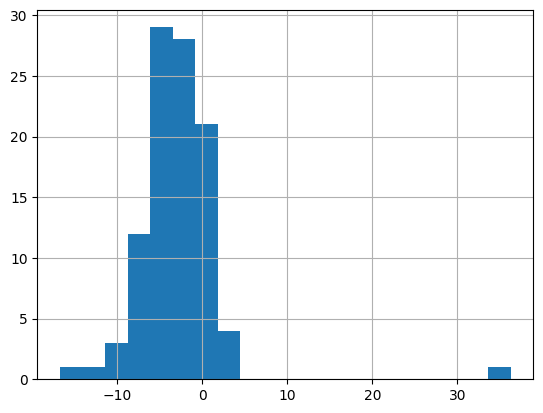

In [4]:
df['diff'] = df['repub_percent_08'] - df['repub_percent_12']

import matplotlib.pyplot as plt
df['diff'].hist(bins=20)

the paired analyses rather than considering the two variables separately we can consider a single variable of the different this is stored in a data frame called sample data with a column named death in this histogram of the different most values are between -10 with at least one outlier.


In [8]:
xbar_diff = df['diff'].mean()
print(xbar_diff)

-2.877109041242944


The sample mean, x-bar, is calculated from this difference. It is around minus two-point-eight-eight.
We can restate the hypotheses in terms of the single population mean, mu-diff, being equal to or less than zero. The test statistic, t, has a slightly simpler equation compared to the two sample case. We have one statistic, so the number of degrees of freedom is the number of pairs minus one.

$H_0: \mu_{diff} = 0$  
$H_a: \mu_{diff} < 0$


### Test Statistic Formula

$t = \frac{\overline{x}_{\text{diff}} - \mu_{\text{diff}}}{\frac{s_{\text{diff}}}{\sqrt{n_{\text{diff}}}}}$

### Degrees of Freedom

$df = n_{\text{diff}} - 1$

### Hypothesis Test Summary

To calculate the test statistic, we need:
- Number of observations: $n = 100$
- Mean of the differences: $\overline{x}_{\text{diff}} = -2.88$
- Assumed mean difference under the null hypothesis: $\mu_{\text{diff}} = 0$
- Standard deviation of the differences: *known or previously computed*
- Degrees of freedom: $df = n - 1 = 99$

### Test Statistic Formula

\[
t = \frac{\overline{x}_{\text{diff}} - \mu_{\text{diff}}}{\frac{s_{\text{diff}}}{\sqrt{n}}}
\]

Using the given values, the calculated test statistic is:

\[
t = -5.6
\]

### p-value Calculation

Using the t-distribution CDF with 99 degrees of freedom:


Since the p-value is much smaller than the significance level $\alpha = 0.05$, we **reject the null hypothesis**.

There is strong evidence to support the alternative hypothesis:  
> Republican candidates received a **smaller percentage of the vote in 2008 compared to 2012**.



In [11]:
n_diff = len(df)
n_diff

100

In [17]:
s_diff = df['diff'].std()
s_diff

np.float64(5.136737887231852)

To calculate the test statistic, we need the number of rows in the dataset, one hundred, and the standard deviation of the differences. We already calculated x-bar-diff, the mean of the differences, as minus two-point-eight-eight. Assuming the null hypothesis is true means mu-diff is zero. We now have everything we need to plug into the equation to calculate t. It's minus five-point-six.

In [18]:
import numpy as np

t_stat = (xbar_diff - 0) / (s_diff / np.sqrt(n_diff))

print("t-statistic:", t_stat)

t-statistic: -5.601043121928489


# The degrees of freedom are one less than n-diff at ninety nine. 

In [21]:
degrees_of_freedom = n_diff-1
degrees_of_freedom 

99

# Finally, we transform t with the t-distribution CDF.

In [23]:
from scipy.stats import t

p_value = t.cdf(t_stat, df=n_diff-1)
print(p_value)

9.572537285272411e-08


# The p-value is really small at around nine-point-six times ten to the minus eight. That means we reject the null hypothesis in favor of the alternative hypothesis that the Republican candidates got a smaller percentage of the vote in 2008 compared to 2012.

# there's an easier way. The pingouin package provides a variety of different methods for hypothesis testing and returns the results as a pandas DataFrame. Its output can be a little friendlier to work with than similar methods from scipy-dot-stats. One method from pingouin is ttest and it works with array-like objects, so the first argument is the Series of differences. For a converted one sample test like this, y specifies the hypothesized difference value from the null hypothesis, which is zero. The type of alternative hypothesis can be specified as two-sided, less, or greater, corresponding to two-tailed, left-tailed, and right-tailed tests, respectively. Here's the output. We can recognize the value of the test statistic, the degrees of freedom, the alternative direction, and the p-value.

In [26]:
import pingouin as pg

# Run a one-sample t-test comparing df['diff'] to 0
result = pg.ttest(x=df['diff'], y=0, alternative='less')

print(result)


               T  dof alternative         p-val          CI95%   cohen-d  \
T-test -5.601043   99        less  9.572537e-08  [-inf, -2.02]  0.560104   

             BF10     power  
T-test  1.323e+05  0.999955  


# ### Conclusion

Based on the hypothesis test, the calculated t-statistic was approximately \(-5.6\) with \(99\) degrees of freedom. The p-value was extremely small (around \(9.6 \times 10^{-8}\)), which is much less than the significance level \(\alpha = 0.05\).

Therefore, we **reject the null hypothesis** and conclude that there is strong statistical evidence to support the claim that the Republican candidates received a smaller percentage of the vote in 2008 compared to 2012.

